## CLAHE of Black and White Image:
Contrast Limited Adaptive Histogram Equalization(CLAHE) of a Black and White Image is fairly straight forward. The image after CLAHE has Cumulative Distribution Function(CDF) as approximately a **straight line**. 

In [49]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [50]:
#Reading the original image, here 0 implies that image is read as grayscale
image = cv2.imread('lc.jpeg', 0)

#Generating the histogram of the original image
hist,bins = np.histogram(image.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

In [51]:
#Creating CLAHE 
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)

#Generating the histogram of the image after applying CLAHE
hist_clahe,bins_clahe = np.histogram(image_clahe.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_clahe = hist_clahe.cumsum()
cdf_clahe_normalized = cdf_clahe * hist_clahe.max()/ cdf_clahe.max()

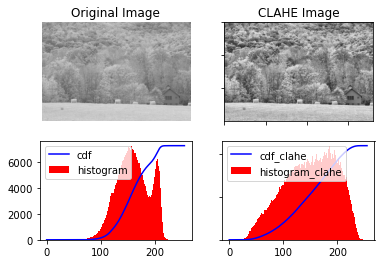

In [52]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_clahe, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('CLAHE Image')


axs[1, 0].plot(cdf_normalized, color = 'b')
axs[1, 0].hist(image.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_clahe_normalized, color = 'b')
axs[1, 1].hist(image_clahe.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_clahe','histogram_clahe'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Histogram Equalization of Color Images
Histogram Equaliztion of color images is a little complicated. OpenCV loads color images in BGR color space. With this color space, it is not possible to equalize the histogram without affecting to the color information because all 3 channels contain color information. Therefore you have to convert the BGR image to a color space like YCrCb. <br>
In YCrCb color space, the **Y channel** of the image only contains intensity information where as Cr and Cb channels contain all the color information of the image. Therefore only the Y channel should be processed to get an image after applying CLAHE without changing any color information.

In [53]:
#Reading the original image, here 1 implies that image is read as color
image_c = cv2.imread('lc.jpeg', 1)

#Generating the histogram of the original image
hist_c,bins_c = np.histogram(image_c.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [55]:
#Converting the image to YCrCb
image_yuv = cv2.cvtColor(image_c, cv2.COLOR_BGR2YUV)

#Creating CLAHE 
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

# Applying Histogram Equalization on the original imageof the Y channel
image_yuv[:,:,0] = clahe.apply(image_yuv[:,:,0])

# convert the YUV image back to RGB format
image_c_clahe = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

#Generating the histogram of the image after applying CLAHE
hist_c_clahe, bins_c_clahe = np.histogram(image_c_clahe.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c_clahe = hist_c_clahe.cumsum()
cdf_c_clahe_normalized = cdf_c_clahe * hist_c_clahe.max()/ cdf_c_clahe.max()


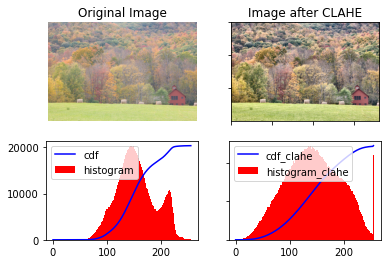

In [56]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_clahe, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('Image after CLAHE')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(image_c.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_clahe_normalized, color = 'b')
axs[1, 1].hist(image_c_clahe.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_clahe','histogram_clahe'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()